<a href="https://colab.research.google.com/github/Ellizence01/dataviz2025/blob/main/Copy_of_Visualize_Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การแสดงผลการกระจายของข้อมูล

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
stopandsearch_df = pd.read_csv('/content/drive/MyDrive/Python&Data_viz2025/2025-01/2025-01-bedfordshire-stop-and-search.csv')
stopandsearch_df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


แปลงค่า Gender และ Age range เป็นจำนวนจริง

In [5]:
stopandsearch_df.groupby('Gender').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Gender,,,,,,,,,,,,,,
Female,40,40,40,0,34,34,40,39,37,40,40,40,10,40
Male,287,287,287,0,240,240,278,280,276,287,287,287,107,287


In [6]:
stopandsearch_df.groupby('Age range').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Age range,,,,,,,,,,,,,,
10-17,45,45,45,0,39,39,43,42,42,45,45,45,17,45
18-24,99,99,99,0,84,84,84,96,97,99,99,99,41,99
25-34,80,80,80,0,63,63,71,79,75,80,80,80,32,80
over 34,126,126,126,0,104,104,119,122,122,126,126,126,40,126
under 10,1,1,1,0,1,1,1,1,1,1,1,1,0,1


In [7]:
stopandsearch_df.shape

(387, 15)

In [8]:
stopandsearch_df_dropna = stopandsearch_df.dropna(subset=['Age range','Gender'])

In [9]:
stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'].replace({'under 10': 10, 'over 34': 34,
                                                                                     '25-34':30,'18-24':21,'10-17':14})

/tmp/ipython-input-3376285857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
/tmp/ipython-input-3376285857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
/tmp/ipython-input-3376285857.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

### สร้าง list ของ ตัวเลข random number ที่เป็น normal distribution

In [10]:
import numpy as np
list_of_rn = np.random.normal(loc=1, scale=0.1, size=len(stopandsearch_df_dropna))

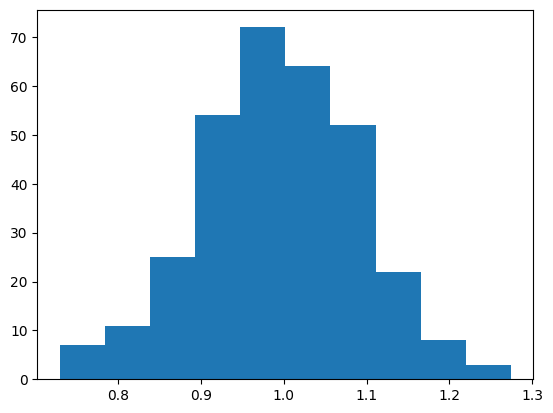

In [11]:
plt.hist(list_of_rn);

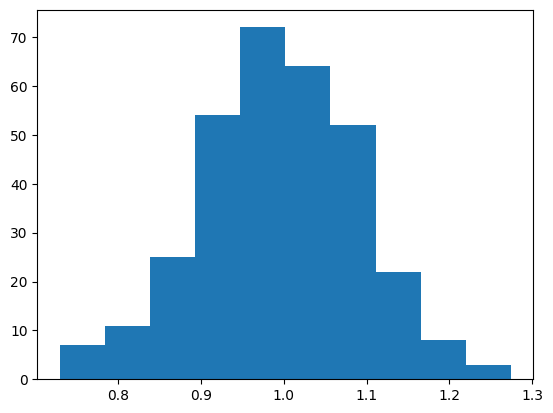

In [33]:
hist_out= plt.hist(list_of_rn)

In [34]:
hist_out

(array([ 7., 11., 25., 54., 72., 64., 52., 22.,  8.,  3.]),
 array([0.7298624 , 0.78429394, 0.83872548, 0.89315703, 0.94758857,
        1.00202011, 1.05645165, 1.11088319, 1.16531473, 1.21974627,
        1.27417781]),
 <BarContainer object of 10 artists>)

In [36]:
hist_out[0]

array([ 7., 11., 25., 54., 72., 64., 52., 22.,  8.,  3.])

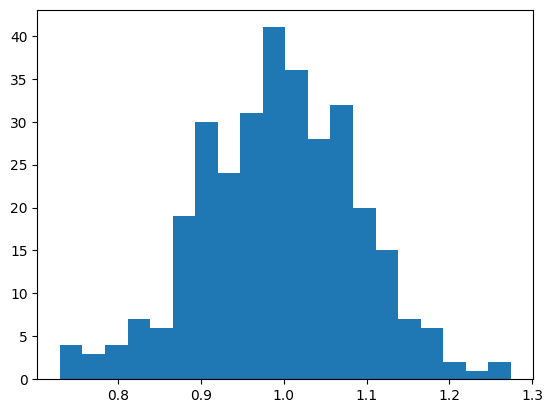

In [38]:
hist_out= plt.hist(list_of_rn,bins=20)

In [12]:
stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'] * list_of_rn

/tmp/ipython-input-864405060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'] * list_of_rn


In [13]:
stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'] * np.random.normal(loc=1, scale=0.01, size=len(stopandsearch_df_dropna))

/tmp/ipython-input-2945934892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'] * np.random.normal(loc=1, scale=0.01, size=len(stopandsearch_df_dropna))


### ลบค่าที่เป็น outliers

In [14]:
stopandsearch_df_dropna = stopandsearch_df_dropna[(stopandsearch_df_dropna['Gender']>=0) & (stopandsearch_df_dropna['Gender']<40)]

In [15]:
stopandsearch_df_dropna.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,34.780327,29.875480,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,33.754778,13.880172,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,35.738097,13.887581,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,0.756177,14.208414,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,33.604802,14.107412,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


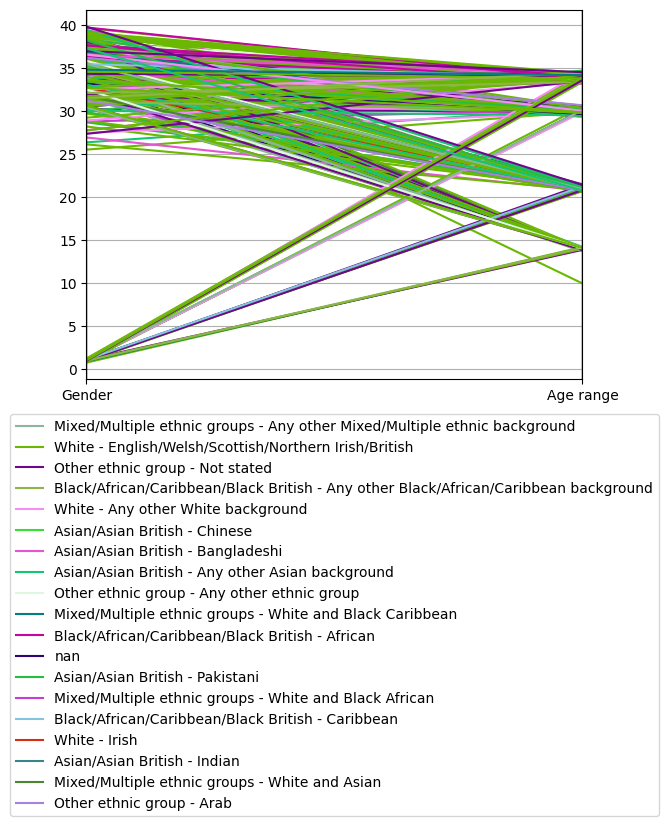

In [16]:
pd.plotting.parallel_coordinates(stopandsearch_df_dropna[['Gender','Age range','Self-defined ethnicity']],'Self-defined ethnicity')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1.2))

# Scatter plot

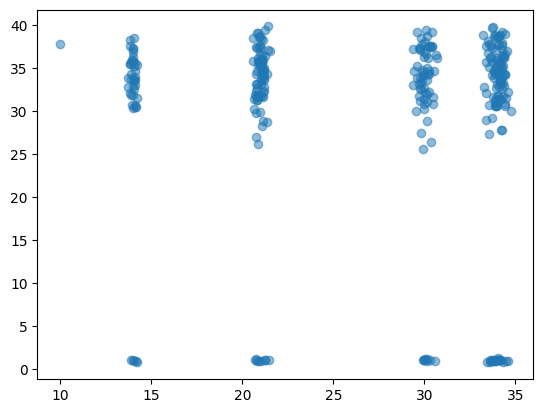

In [17]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'],alpha = 0.5)

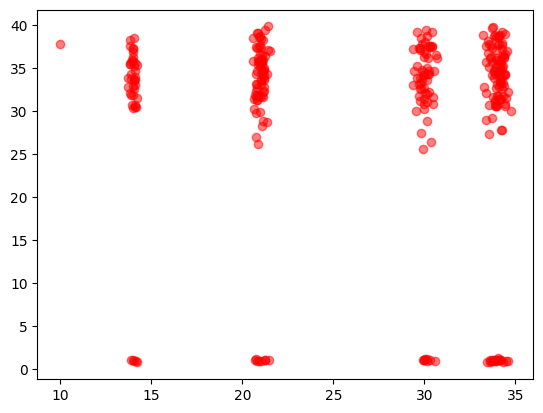

In [18]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'],c='r',alpha = 0.5)

In [ ]:
##ใช้ค่าสีในการแสดงค่าของ column อื่น
#ตัวอย่าง column > Officer-defined ethnicity

In [19]:
stopandsearch_df_dropna.groupby('Officer-defined ethnicity').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Officer-defined ethnicity,,,,,,,,,,,,,,
Asian,65,65,65,0,53,53,65,65,63,65,65,65,26,65
Black,47,47,47,0,37,37,47,47,47,47,47,47,19,47
Other,8,8,8,0,6,6,8,8,8,8,8,8,4,8
White,169,169,169,0,144,144,169,169,163,169,169,169,57,169


In [21]:
stopandsearch_df_dropna['Officer-defined ethnicity'] = stopandsearch_df_dropna['Officer-defined ethnicity'].replace({'Black': 0, 'Asian': 2,'Other':1,'White':3})

/tmp/ipython-input-2966710471.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stopandsearch_df_dropna['Officer-defined ethnicity'] = stopandsearch_df_dropna['Officer-defined ethnicity'].replace({'Black': 0, 'Asian': 2,'Other':1,'White':3})


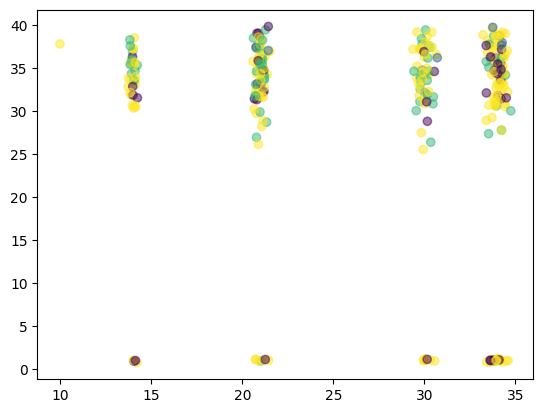

In [22]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'],c=stopandsearch_df_dropna['Officer-defined ethnicity'],alpha = 0.5)

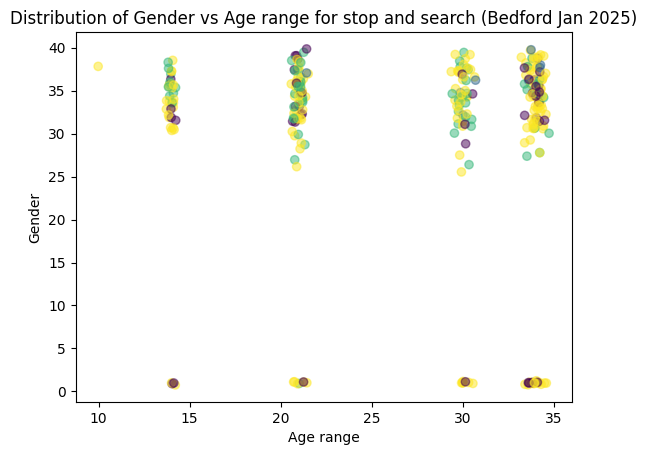

In [23]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'],
            c=stopandsearch_df_dropna['Officer-defined ethnicity'],alpha = 0.5)
plt.title('Distribution of Gender vs Age range for stop and search (Bedford Jan 2025)')
plt.xlabel('Age range')
plt.ylabel('Gender');


#Plot-Legend

In [24]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df2= df.copy()
df2['Name'] = df2['Name'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
df2.head()

/tmp/ipython-input-2918318930.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Name'] = df2['Name'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Scatter 2D

## scatter - default

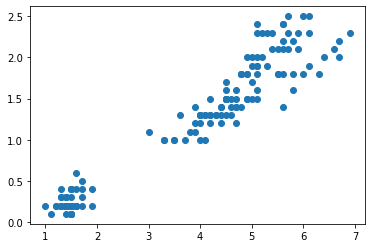

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'])

### color

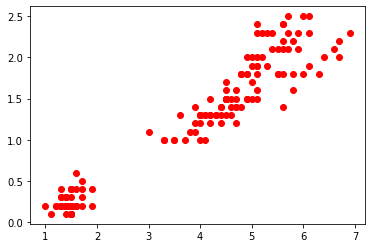

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c='r')

## ใส่สีให้แต่ละจุด

In [ ]:
set(df['Name']) #ดูว่ามีค่าอะไรบ้าง

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [ ]:
df2 = df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


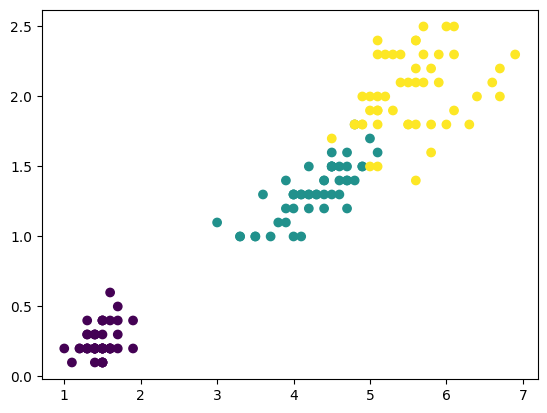

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'])

### alpha กำหนดความโปร่งแสง

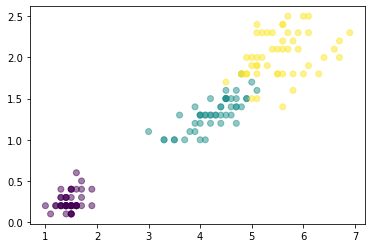

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ใช้ขนาดของ marker แสดงค่าของ feature

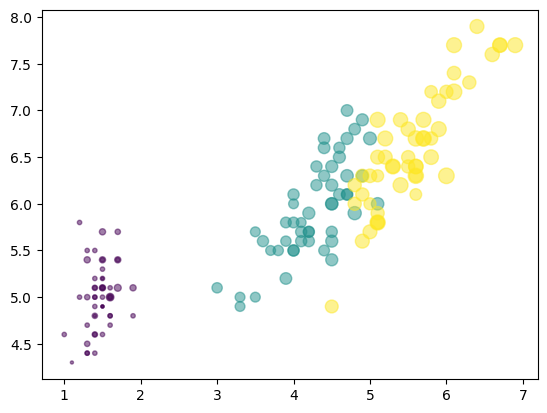

In [ ]:
plt.scatter(df['PetalLength'],df['SepalLength'],s=50*df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ตัวแปร Marker ใช้ในการเปลี่ยนหน้าตาของ marker

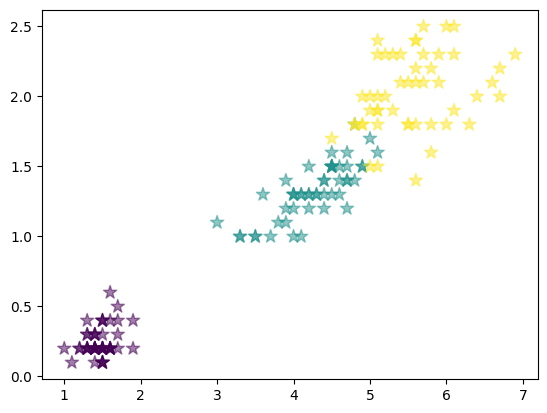

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],s=100,c=df2['Name'],alpha=0.5,marker='*')

## การ plot กราฟหลายๆอันซ้อนกัน

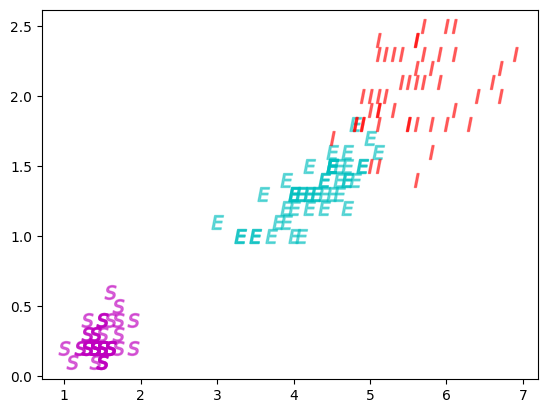

In [ ]:
plt.scatter(df['PetalLength'][:50],df['PetalWidth'][:50],s=100,c='m',alpha=0.5,marker='$S$')
plt.scatter(df['PetalLength'][50:100],df['PetalWidth'][50:100],s=100,c='c',alpha=0.5,marker='$E$')
plt.scatter(df['PetalLength'][100:],df['PetalWidth'][100:],s=100,c='r',alpha=0.5,marker='$I$')

###Label-Legend

```plt.plot()``` input  ตัวที่ 3 คือ ตัวกำหนดหน้าตาของ marker

'หน้าตาmarker'-'ลักษณะของเส้นเชื่อมจุด'-'สี'

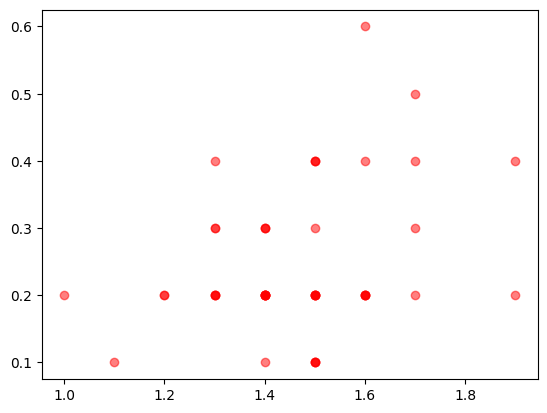

In [25]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5)

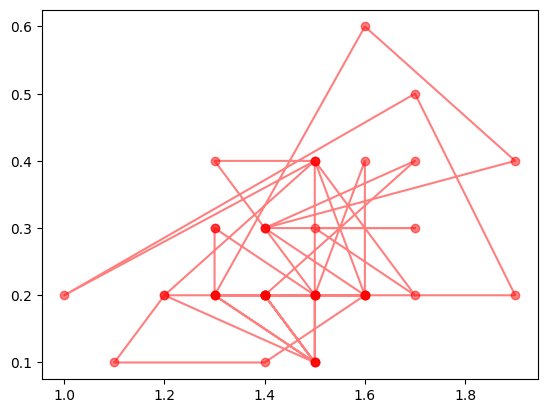

In [26]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o-r',alpha=0.5)

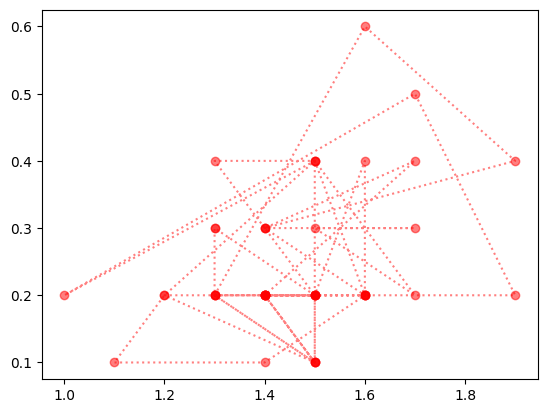

In [27]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o:r',alpha=0.5)

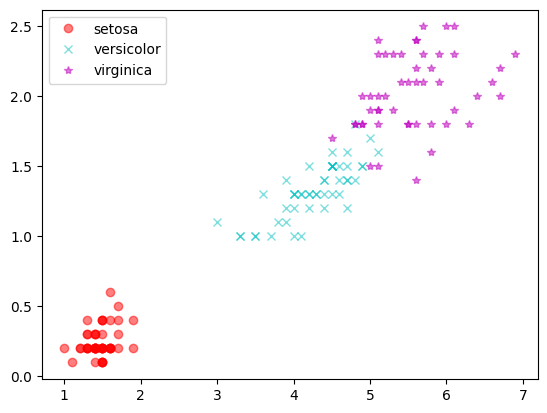

In [28]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend()

### การใส่ชื่อกราฟ และชื่อแกน

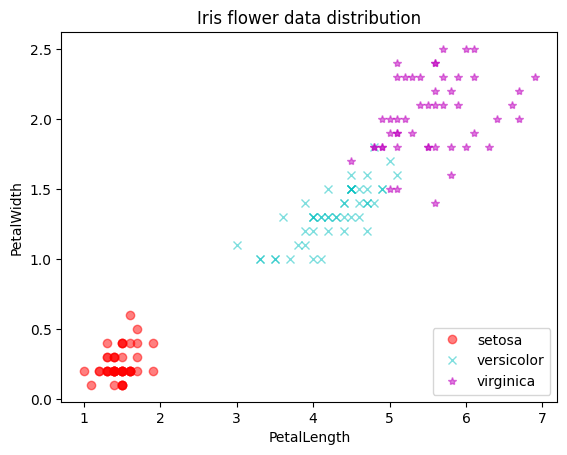

In [29]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend(loc='lower right')
plt.title('Iris flower data distribution') ##ชื่อกราฟ
plt.xlabel('PetalLength') ##ชื่อแกน X
plt.ylabel('PetalWidth'); ##ชื่อแกน y

### 3D scatter

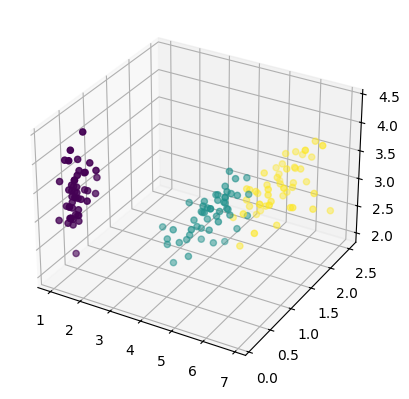

In [32]:
ax = plt.axes(projection ="3d")
ax.scatter3D(df['PetalLength'],df['PetalWidth'],df['SepalWidth'],c=df2['Name'])

## Bubble Chart

Scatter plot ที่ใช้ขนาดของ marker ในการสื่อปริมาณของข้อมูล

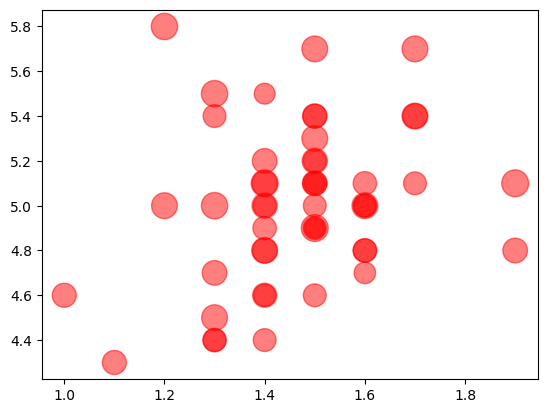

In [39]:
plt.scatter(df['PetalLength'][:50],df['SepalLength'][:50],s=150*df['PetalWidth'][100:],c='r',alpha=0.5)

### Example

### Box-plot

In [40]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


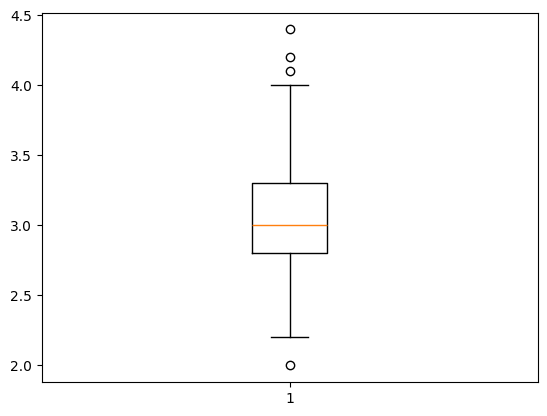

In [42]:
O = plt.boxplot(df['SepalWidth'])

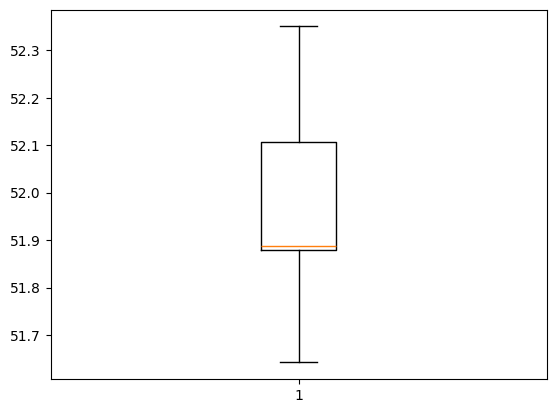

In [48]:
l = plt.boxplot(stopandsearch_df['Latitude'].dropna())

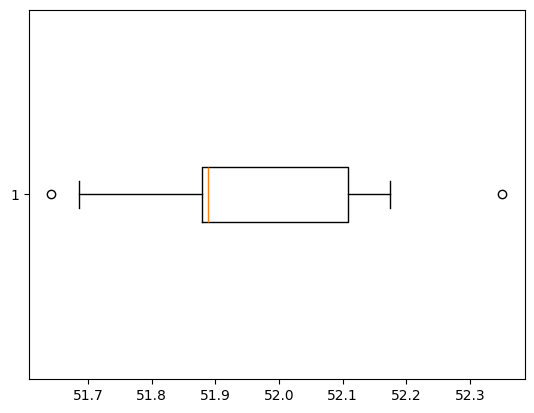

In [50]:
l = plt.boxplot(stopandsearch_df['Latitude'].dropna(),whis=1,vert=False)

In [51]:
l

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92170aeae0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92170af080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f92170ae7b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f92170af680>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f92170af860>],
 'means': []}

In [43]:
O

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9217cbe5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9217cbebd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9217cbe300>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9217cbf0b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9217cbf380>],
 'means': []}

In [52]:
l['fliers']

In [53]:
l['fliers'][0]

In [57]:
dir(l['fliers'][0])

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_axes',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_color',
 '_dash_pattern',
 '_dashcapstyle',
 '_dashjoinstyle',
 '_different_canvas',
 '_drawStyles_l',
 '_drawStyles_s',
 '_drawstyle',
 '_fully_clipped_to_axes',
 '_gapcolor',
 '_get_markerfacecolor',
 '_get_transformed_path',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_invalidx',
 '_invalidy',
 '_label',
 '_lineStyles',
 '_linestyle',
 '_linestyles',
 '_linewidth',
 '_marker',
 '_markeredgecolor',
 '_markeredgewidth',
 '_markerfac

In [59]:
l['fliers'][0].get_xdata()

array([51.642262, 52.349993])

In [69]:
stopandsearch_df[(stopandsearch_df['Latitude']==l['fliers'][0].get_xdata()[0])|
                 (stopandsearch_df['Latitude']==l['fliers'][0].get_xdata()[1])]

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
53,Person search,2025-01-06T14:10:00+00:00,False,NaN,51.642262,-0.052279,Male,25-34,Other ethnic group - Not stated,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
80,Person search,2025-01-07T20:40:00+00:00,False,NaN,52.349993,-0.178056,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False


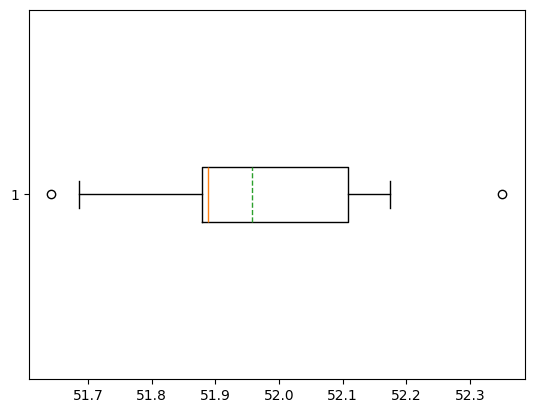

In [74]:
O = plt.boxplot(stopandsearch_df['Latitude'].dropna(),whis=1,vert=False,showmeans=True,meanline=True)

In [ ]:
O

{'boxes': [<matplotlib.lines.Line2D at 0x7f7f44299ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7f44220f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f4422e490>],
 'means': [<matplotlib.lines.Line2D at 0x7f7f44226f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f44226a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7f44220490>,
  <matplotlib.lines.Line2D at 0x7f7f442209d0>]}

In [72]:
l['whiskers'][0].get_xdata()

array([51.879602, 51.685394])

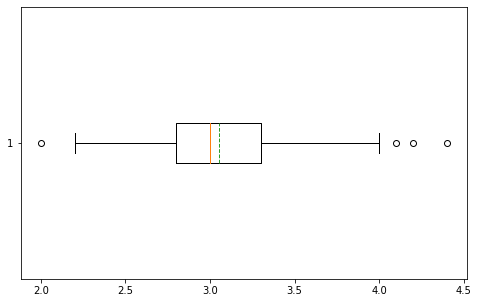

In [ ]:
O = plt.boxplot(df['SepalWidth'],showmeans=True,meanline=True,vert=False)

#Subplot

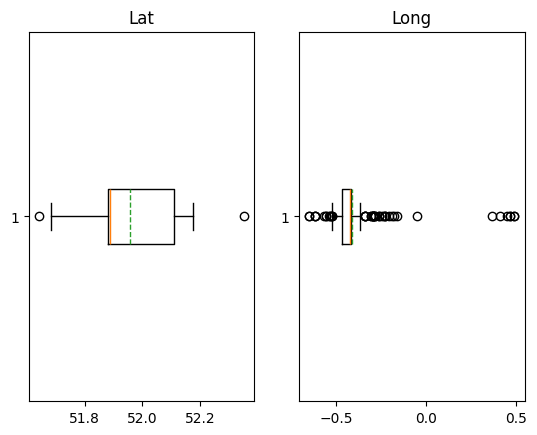

In [77]:
plt.subplot(1,2,1)
plt.boxplot(stopandsearch_df['Latitude'].dropna(),whis=1,vert=False,showmeans=True,meanline=True)
plt.title('Lat')
plt.subplot(1,2,2)
plt.boxplot(stopandsearch_df['Longitude'].dropna(),whis=1,vert=False,showmeans=True,meanline=True)
plt.title('Long');

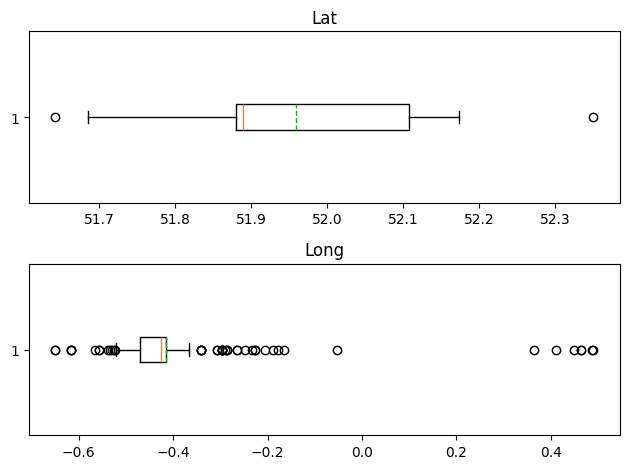

In [86]:
plt.subplot(2,1,1)
plt.boxplot(stopandsearch_df['Latitude'].dropna(),whis=1,vert=False,showmeans=True,meanline=True)
plt.title('Lat')
plt.subplot(2,1,2)
plt.boxplot(stopandsearch_df['Longitude'].dropna(),whis=1,vert=False,showmeans=True,meanline=True)
plt.title('Long')
plt.tight_layout();

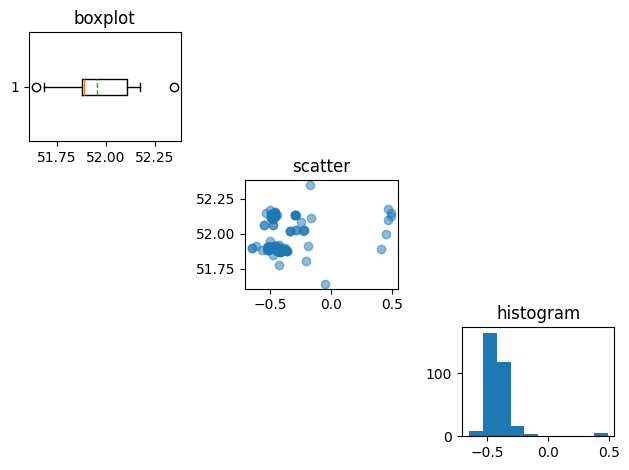

In [89]:
#Quiz 11 plot กราฟ 3 อันในแนวแทยงมุม
# 1.boxplot 2.scatter 3.histogram
plt.subplot(3,3,1)
plt.boxplot(stopandsearch_df['Latitude'].dropna(),whis=1,vert=False,showmeans=True,meanline=True)
plt.title('boxplot')

plt.subplot(3,3,5)
plt.scatter(stopandsearch_df_dropna['Longitude'], stopandsearch_df_dropna['Latitude'], alpha=0.5)
plt.title('scatter')

plt.subplot(3,3,9)
plt.hist(stopandsearch_df['Longitude'].dropna())
plt.title('histogram')

plt.tight_layout()

# HW7 plot กราฟ แสดง การกระจายของข้อมูลใน india imdb และ มาพรีเซ็น เป็นกลุ่ม (2 กราฟ)